In [2]:
import csv
import sys
import pandas as pd
import ast
import json

# フィールドサイズの制限を最大限まで引き上げる
csv.field_size_limit(sys.maxsize)

import matplotlib.pyplot as plt

In [3]:
import numpy as np

x_values=[]
start=16
end=4
value=float(10**(-start))
for i in range(start-end):
    x_values.append(value)
    value=value*10.0
print(x_values)

[1e-16, 1e-15, 1.0000000000000002e-14, 1.0000000000000002e-13, 1.0000000000000002e-12, 1.0000000000000001e-11, 1.0000000000000002e-10, 1.0000000000000003e-09, 1.0000000000000004e-08, 1.0000000000000004e-07, 1.0000000000000004e-06, 1.0000000000000004e-05]


In [4]:
# ヘッダーがないCSVを読み込む
df = pd.read_csv('output2410_b200.csv', header=None)
#str化したcsvをlistになおす
itr_all=[]
u_max_list_all=[]
u_min_list_all = []
for batch_idx, row in df.iterrows():
    # iter_list, u_max_list, u_min_listをDataFrameのカラムから取得
    iter_list = row[1]
    u_max_list = row[2]
    u_min_list = row[3]

    iter_list = ast.literal_eval(iter_list)
    u_max_list = ast.literal_eval(u_max_list)
    u_min_list = ast.literal_eval(u_min_list)

    itr_all.extend(iter_list)
    u_max_list_all.extend(u_max_list)
    u_min_list_all.extend(u_min_list)


# residualの最大値を取得（2番目の列、インデックスは1）
max_residual = max(itr_all)
min_residual = min([x for x in itr_all if x > 0])*1e-1
# umaxの最大値を取得（3番目の列、インデックスは2）
max_umax = max(u_max_list_all)*1.1

# uminの最小値を取得（4番目の列、インデックスは3）
min_umin = min(u_min_list_all)*1.1

# 結果を表示
print(f"Residualの最大値: {max_residual}")
print(f"Residualの最小値: {min_residual}")
print(f"Umaxの最大値: {max_umax}")
print(f"Uminの最小値: {min_umin}")

Residualの最大値: 2.3363734726444818e-05
Residualの最小値: 3.552713678800501e-16
Umaxの最大値: 0.0007152114878408611
Uminの最小値: -0.0004745321202790365


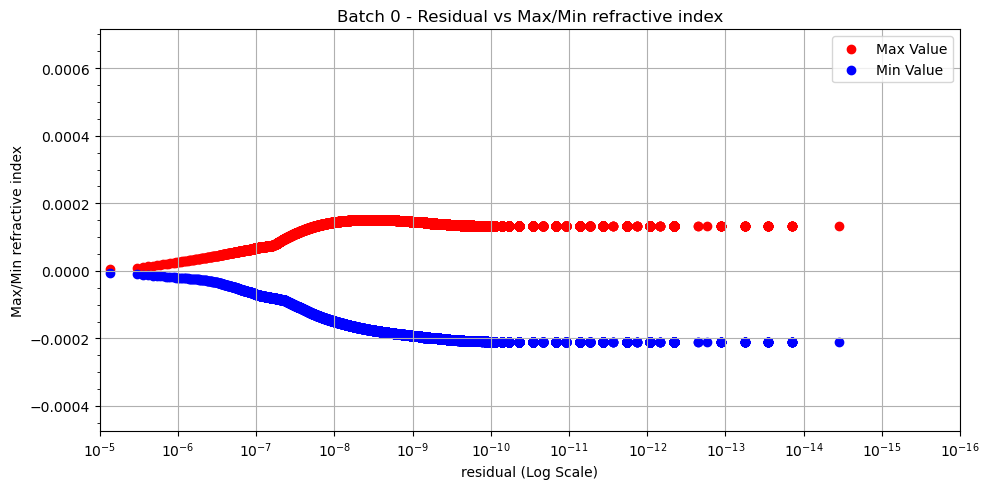

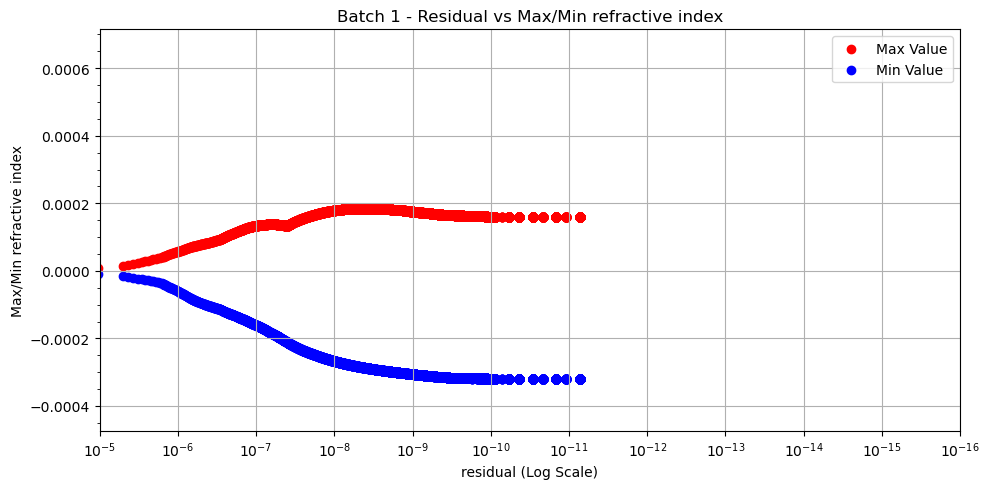

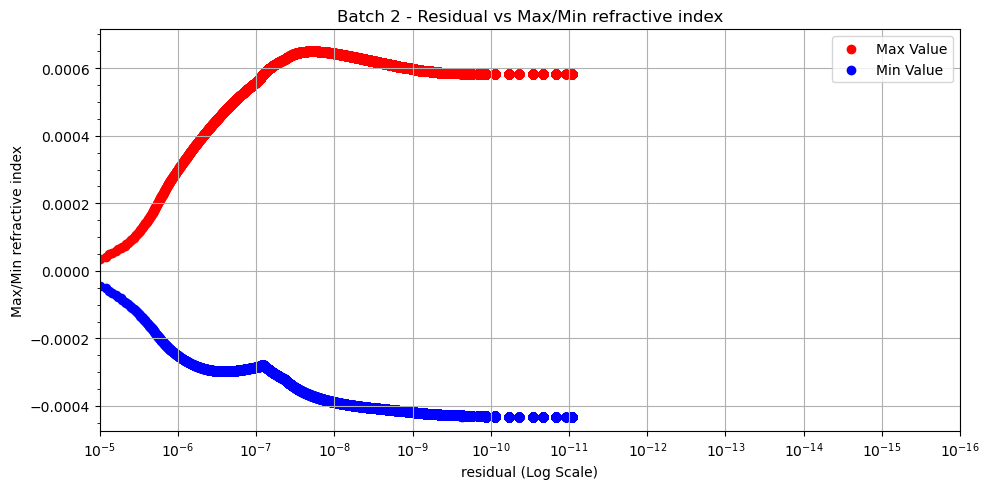

In [5]:
# DataFrameから結果をループ処理
for batch_idx, row in df.iterrows():
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # iter_list, u_max_list, u_min_listをDataFrameのカラムから取得
    iter_list = row[1]
    u_max_list = row[2]
    u_min_list = row[3]

    iter_list = ast.literal_eval(iter_list)
    u_max_list = ast.literal_eval(u_max_list)
    u_min_list = ast.literal_eval(u_min_list)

    # 0以上の要素だけフィルタリング
    iter_list_filtered = [float(x) for x in iter_list if float(x) > 0]
    u_max_list_filtered = [float(u_max_list[i]) for i in range(len(iter_list)) if float(iter_list[i]) > 0]
    u_min_list_filtered = [float(u_min_list[i]) for i in range(len(iter_list)) if float(iter_list[i]) > 0]

    # 点をプロット
    ax.scatter(iter_list_filtered, u_max_list_filtered, label='Max Value', color='r')
    ax.scatter(iter_list_filtered, u_min_list_filtered, label='Min Value', color='b')
    
    ax.set_xlim(1e-5, min_residual)  # X軸の範囲を逆に設定して反転
    ax.set_ylim(min_umin,max_umax)
    ax.set_xscale('log')  # X軸を対数スケールに設定
    ax.set_xlabel('residual (Log Scale)')
    ax.set_ylabel('Max/Min refractive index')
    ax.set_title(f'Batch {batch_idx} - Residual vs Max/Min refractive index')
    ax.legend()
    plt.xticks(x_values)
    ax.minorticks_on()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

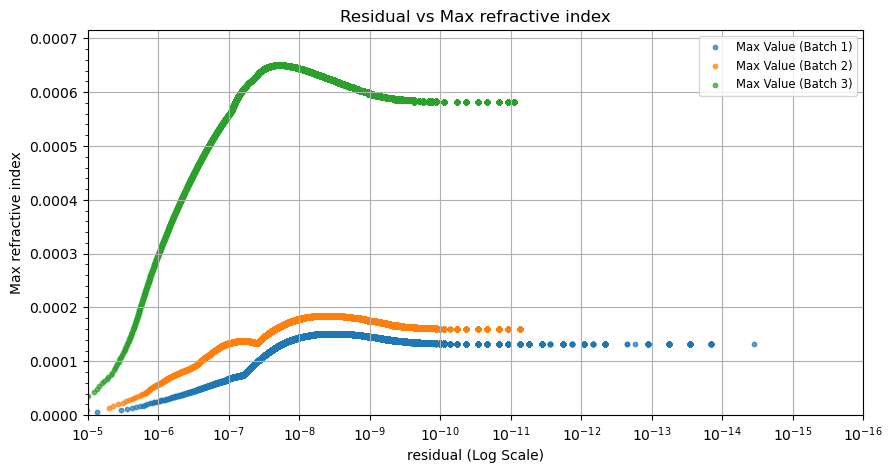

In [6]:
def plot_all_batches_max(df):
    # 全てのbatchのデータをリストに格納
    all_iter_lists = []
    all_u_max_lists = []
    all_u_min_lists = []
    for _, row in df.iterrows():
        iter_list = json.loads(row[1])
        u_max_list = json.loads(row[2])
        u_min_list = json.loads(row[3])

        all_iter_lists.append(iter_list)
        all_u_max_lists.append(u_max_list)
        all_u_min_lists.append(u_min_list)

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, (iter_list, u_max_list, u_min_list) in enumerate(zip(all_iter_lists, all_u_max_lists, all_u_min_lists)):
        # 0以上の要素のインデックスを取得
        valid_indices = [i for i, x in enumerate(iter_list) if float(x) > 0]

        # フィルタリング
        iter_list_filtered = [iter_list[i] for i in valid_indices]
        u_max_list_filtered = [u_max_list[i] for i in valid_indices]
        u_min_list_filtered = [u_min_list[i] for i in valid_indices]

        ax.scatter(iter_list_filtered, u_max_list_filtered, label=f'Max Value (Batch {i+1})', s=10, alpha=0.7)  # マーカーサイズと透明度を調整
        #ax.scatter(iter_list_filtered, u_min_list_filtered, label=f'Min Value (Batch {i+1})', s=10, alpha=0.7)
    
    # グラフのカスタマイズ
    ax.set_xscale('log')
    ax.set_xlim(1e-5, min_residual)  # X軸の範囲を逆に設定して反転
    ax.set_ylim(0,max_umax)
    ax.set_xlabel('residual (Log Scale)')
    ax.set_ylabel('Max refractive index')
    ax.set_title('Residual vs Max refractive index')
    ax.legend(loc='upper right', fontsize='small')  # 凡例の位置とフォントサイズを調整
    ax.minorticks_on()
    plt.xticks(x_values)
    ax.grid(True)

    # グラフを表示
    plt.show()
plot_all_batches_max(df)

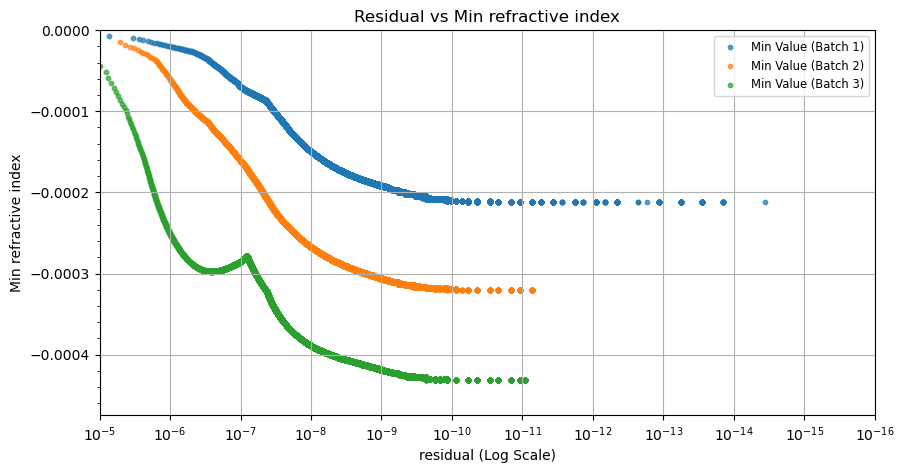

In [7]:
def plot_all_batches_min(df):
    # 全てのbatchのデータをリストに格納
    all_iter_lists = []
    all_u_max_lists = []
    all_u_min_lists = []
    for _, row in df.iterrows():
        iter_list = json.loads(row[1])
        u_max_list = json.loads(row[2])
        u_min_list = json.loads(row[3])

        all_iter_lists.append(iter_list)
        all_u_max_lists.append(u_max_list)
        all_u_min_lists.append(u_min_list)

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, (iter_list, u_max_list, u_min_list) in enumerate(zip(all_iter_lists, all_u_max_lists, all_u_min_lists)):
        # 0以上の要素のインデックスを取得
        valid_indices = [i for i, x in enumerate(iter_list) if float(x) > 0]

        # フィルタリング
        iter_list_filtered = [iter_list[i] for i in valid_indices]
        u_max_list_filtered = [u_max_list[i] for i in valid_indices]
        u_min_list_filtered = [u_min_list[i] for i in valid_indices]

        #ax.scatter(iter_list_filtered, u_max_list_filtered, label=f'Max Value (Batch {i+1})', s=10, alpha=0.7)  # マーカーサイズと透明度を調整
        ax.scatter(iter_list_filtered, u_min_list_filtered, label=f'Min Value (Batch {i+1})', s=10, alpha=0.7)
    
    # グラフのカスタマイズ
    ax.set_xscale('log')
    ax.set_xlim(1e-5, min_residual)  # X軸の範囲を逆に設定して反転
    ax.set_ylim(min_umin,0)
    ax.set_xlabel('residual (Log Scale)')
    ax.set_ylabel('Min refractive index')
    ax.set_title('Residual vs Min refractive index')
    ax.legend(loc='upper right', fontsize='small')  # 凡例の位置とフォントサイズを調整
    ax.minorticks_on()
    plt.xticks(x_values)
    ax.grid(True)

    # グラフを表示
    plt.show()
plot_all_batches_min(df)

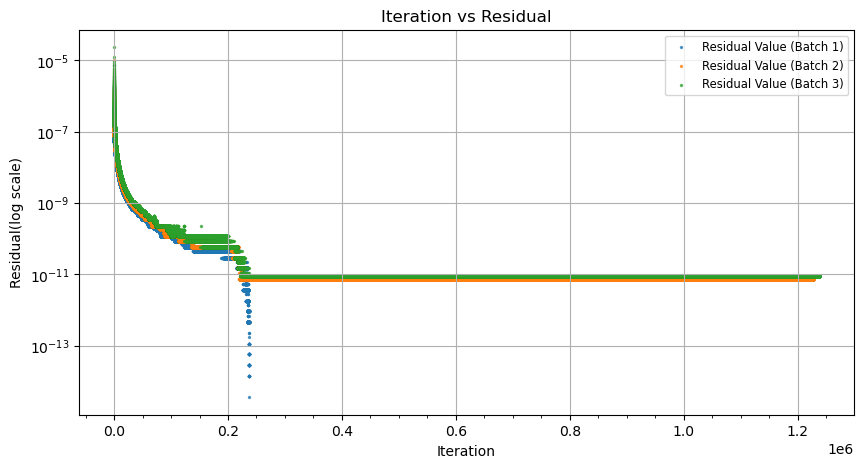

In [8]:
def plot_all_batches_iter(df):
    # 全てのbatchのデータをリストに格納
    all_iter_lists = []
    all_res_lists = []
    for _, row in df.iterrows():
        res_list = json.loads(row[1])
        iter_list = json.loads(row[4])

        all_res_lists.append(res_list)
        all_iter_lists.append(iter_list)

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, (res_list, iter_list) in enumerate(zip(all_res_lists, all_iter_lists)):
        # 0以上の要素のインデックスを取得
        valid_indices = [i for i, x in enumerate(res_list) if float(x) > 0]

        # フィルタリング
        iter_list_filtered = [iter_list[i] for i in valid_indices]
        res_list_filtered = [res_list[i] for i in valid_indices]

        ax.scatter(iter_list_filtered, res_list_filtered, label=f'Residual Value (Batch {i+1})', s=2, alpha=0.7)
    
    # グラフのカスタマイズ
    ax.set_yscale('log')
    ax.set_ylabel('Residual(log scale)')
    ax.set_xlabel('Iteration')
    ax.set_title('Iteration vs Residual')
    ax.legend(loc='upper right', fontsize='small')  # 凡例の位置とフォントサイズを調整
    ax.minorticks_on()
    ax.grid(True)

    # グラフを表示
    plt.show()
plot_all_batches_iter(df)